#Importing all libraries

In [1]:
import matplotlib.pyplot as plt
import librosa
import soundfile
import sklearn
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
#from sklearn import linear_model
from sklearn.svm import SVC
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def extract_features(file_name,mfcc,chroma,mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X=sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
            result=np.hstack((result,mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
            result=np.hstack((result,chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X,sr=sample_rate).T,axis=0)
            result=np.hstack((result,mel))
    return result

In [3]:
emotions={'01':'neutral','02':'calm','03':'happy','04':'sad','05':'angry','06':'fearful','07':'disgust','08':'surprised'}
available_emotions={'neutral','angry','happy','calm'}

In [4]:
def load_data():
    x,y=[],[]
    for file in glob.glob(r"speech-emotion-recognition-ravdess-data\Actor_*\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in available_emotions:
            continue
        feature=extract_features(file,mfcc=True,chroma=True,mel=True)
        x.append(feature)
        y.append(emotion)
    return (np.array(x),y)

In [5]:
accuracy_of_model=[]
training_accuracy=[]

In [6]:
x1,y1=load_data()
x_train,x_test,y_train,y_test=train_test_split(x1, y1, test_size=0.25, random_state=9)

In [7]:
print((x_train.shape[0], x_test.shape[0]))

(504, 168)


In [8]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [9]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [10]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [11]:
Y=model.predict(x_train)
accuracy=accuracy_score(y_true=y_train, y_pred=Y)
training_accuracy.append(accuracy)
print("Training Accuracy: {:.2f}%".format(accuracy*100))

Training Accuracy: 99.01%


In [12]:
y_pred=model.predict(x_test)

In [13]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_of_model.append(accuracy)
print("Testing Accuracy: {:.2f}%".format(accuracy*100))

Testing Accuracy: 83.93%


In [14]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred=neigh.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_of_model.append(accuracy)
print("Testing Accuracy: {:.2f}%".format(accuracy*100))

Testing Accuracy: 73.81%


In [16]:
Y=neigh.predict(x_train)
accuracy=accuracy_score(y_true=y_train, y_pred=Y)
training_accuracy.append(accuracy)
print("Training Accuracy: {:.2f}%".format(accuracy*100))

Training Accuracy: 84.13%


In [17]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

C:\Users\ymss1\.conda\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_of_model.append(accuracy)
print("Testing Accuracy: {:.2f}%".format(accuracy*100))

Testing Accuracy: 68.45%


In [19]:
Y=clf.predict(x_train)
accuracy=accuracy_score(y_true=y_train, y_pred=Y)
training_accuracy.append(accuracy)
print("Training Accuracy: {:.2f}%".format(accuracy*100))

Training Accuracy: 73.41%


In [20]:
dec = tree.DecisionTreeClassifier()
dec = dec.fit(x_train, y_train)

In [21]:
y_pred=dec.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_of_model.append(accuracy)
print("Testing Accuracy: {:.2f}%".format(accuracy*100))

Testing Accuracy: 60.71%


In [22]:
Y=dec.predict(x_train)
accuracy=accuracy_score(y_true=y_train, y_pred=Y)
training_accuracy.append(accuracy)
print("Training Accuracy: {:.2f}%".format(accuracy*100))

Training Accuracy: 100.00%


In [23]:
bgclf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(x_train, y_train)

In [24]:
y_pred=bgclf.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_of_model.append(accuracy)
print("Testing Accuracy: {:.2f}%".format(accuracy*100))

Testing Accuracy: 53.57%


In [25]:
Y=bgclf.predict(x_train)
accuracy=accuracy_score(y_true=y_train, y_pred=Y)
training_accuracy.append(accuracy)
print("Training Accuracy: {:.2f}%".format(accuracy*100))

Training Accuracy: 56.55%


In [26]:
models=['MLPClassifier','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','BaggingClassifier']

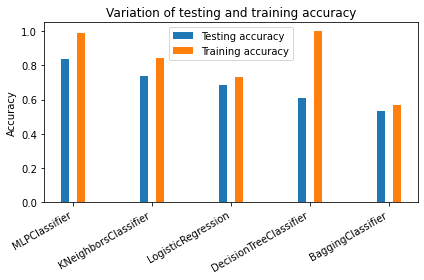

In [27]:
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.1 , accuracy_of_model, 0.1, label='Testing accuracy')
rects2 = ax.bar(x+0.1 , training_accuracy, 0.1, label='Training accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Variation of testing and training accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend()
fig.tight_layout()

plt.show()

In [28]:
training_accuracy=np.array(training_accuracy)
accuracy_of_model=np.array(accuracy_of_model)
difference=np.array((training_accuracy-accuracy_of_model)*100)
print("Difference in training and testing accuracies of the models",difference)

Difference in training and testing accuracies of the models [15.07936508 10.31746032  4.96031746 39.28571429  2.97619048]


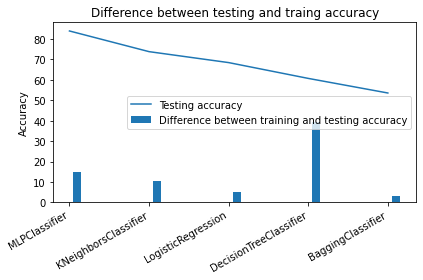

In [29]:
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.plot(accuracy_of_model*100, label='Testing accuracy')
rects2 = ax.bar(x+0.1 , difference, 0.1, label='Difference between training and testing accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Difference between testing and traing accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend()
fig.tight_layout()

plt.show()

In [30]:
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(model, open("result/mlp_classifier.model", "wb"))